### Make your own Feed forward network

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

### This is the data we'll be using

In [64]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [65]:
X.shape

(50, 2)

In [66]:
X[0], y[0]

(array([-0.15856989,  0.98480618]), 0)

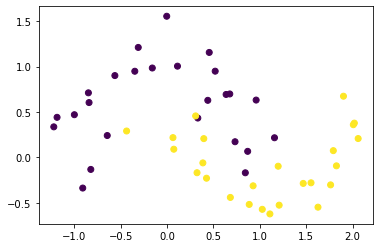

In [67]:
plt.scatter(X[:,0],X[:,1],c=y)

### Some preprocessing required

In [68]:
# PREPROCESSING - write a sigmoid function
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [69]:
# PREPROCESSING - adding a bias neuron to X
def add_bias(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

In [70]:
X_bias = add_bias(X)

In [71]:
X_bias[0]

array([-0.15856989,  0.98480618,  1.        ])

In [136]:
X_bias[0].shape

(3,)

In [73]:
# PREPROCESSING - make the weight matrices - shape of w1 is 3,2
w1 = np.random.random(size=(3,2))
#shape of w2 is 3,1
w2 = np.random.random(size=(3,1))

weights = [w1,w2]

### Now recreating the feed forward function

In [74]:
# step 1- dot product of input data and weight matrix 1
step1 = np.dot(X_bias, weights[0])

In [75]:
# dot product of 50,3 and 3,2 is 50,2
X_bias.shape, weights[0].shape, step1.shape

((50, 3), (3, 2), (50, 2))

In [76]:
# pass the result of step1 through and activation function
step2 = sigmoid(step1)

In [77]:
step2.shape

(50, 2)

In [78]:
# add bias neuron
step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])

In [79]:
step3.shape

(50, 3)

In [80]:
# dot product 
step4 = np.dot(step3, weights[1])

In [81]:
step3.shape, weights[1].shape, step4.shape

((50, 3), (3, 1), (50, 1))

In [132]:
# sigmoid activation
step5 = sigmoid(step4)

In [133]:
step5.shape

(50, 1)

In [134]:
# ypred
ypred = step5

In [135]:
ypred.shape

(50, 1)

### Here's the function in its totality (cf the backprop lecture)

In [166]:
def feed_forward(X, weights):

    ''' STEP 1. calculate the dot product of X
    (shape of (50,3))
    and the weights of the first layer
    (shape of (3, 2))
    this results in an output shape of (50, 2)'''
    step1 = np.dot(X, weights[0])


    ''' STEP 2. apply the sigmoid function on the result
    (applying the sigmoid function on a 50x2 matrix outputs the same shape.
    '''
    step2 = sigmoid(step1)


    ''' STEP 3. append an extra 1 for the bias to the result
    (this results in a 50x3 matrix)'''
    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])


    ''' STEP 4. calculate the dot product of X (from step 3)
    (shape of (50, 3))
    and the weights of the second layer
    (shape of (3, 1)). This results in an output shape of (50, 1)'''
    step4 = np.dot(step3, weights[1])


    ''' STEP 5. apply the sigmoid function on the result'''
    step5 = sigmoid(step4)
    return step2, step5

In [167]:
#we can call it to get ypred
step2, ypred = feed_forward(X_bias, weights)

In [168]:
#compare to actual data
ypred.shape, y.shape

((50, 1), (50,))

In [67]:
#for a quasi loss -well use hte real loss (log loss) this afternoon
quasi_loss = ypred - y

### in ML, we improve our guess through gradient descent - in DL this is called Backpropagation - more on this this afternoon

## Step 2 - Log-loss function

In [141]:
# Step 2 - Log-Loss function
def log_loss(ytrue, ypred):
    loss = -(ytrue * np.log(ypred) + (1 - ytrue) * np.log(1 - ypred))
    return loss

In [142]:
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

## Step 3 - Calculate inital loss

In [169]:
# Step 3 - Get initial loss
step2, step5 = feed_forward(X_bias, weights)
ytrue = y.reshape(-1, 1)
loss = log_loss(ytrue, step5)

In [170]:
step5.shape, ytrue.shape, loss.shape

((50, 1), (50, 1), (50, 1))

## Step 4 - backpropagation sequentially

In [223]:
'''EQUATION A:'''
error = (step5 - ytrue) * log_loss(ytrue , step5)

In [226]:
error[0:5], step5[0:5]

(array([[ 1.16602685],
        [-0.06214501],
        [-0.05921476],
        [-0.05233889],
        [ 1.09963813]]),
 array([[0.77701474],
        [0.7664079 ],
        [0.77161233],
        [0.78443204],
        [0.76324684]]))

In [227]:
'''EQUATION B:'''
hidden_outer = add_bias(step2)
hidden_outer[0:5]

array([[0.85192136, 0.6174124 , 1.        ],
       [0.74155714, 0.55548641, 1.        ],
       [0.79765165, 0.58080159, 1.        ],
       [0.9028757 , 0.71925192, 1.        ],
       [0.72919226, 0.49747242, 1.        ]])

In [229]:
sigm_deriv = step5 * (1 - step5)
sigm_deriv

array([[0.17326284],
       [0.17902683],
       [0.17622674],
       [0.16909841],
       [0.1807011 ],
       [0.16581235],
       [0.17984094],
       [0.18187116],
       [0.18038375],
       [0.18424603],
       [0.17156099],
       [0.16967363],
       [0.17334445],
       [0.16985041],
       [0.17424046],
       [0.17465649],
       [0.17450822],
       [0.16664803],
       [0.16676352],
       [0.17661979],
       [0.17065209],
       [0.17244395],
       [0.19370175],
       [0.18055866],
       [0.17891769],
       [0.17653157],
       [0.17171198],
       [0.17858813],
       [0.1791546 ],
       [0.17089283],
       [0.17460894],
       [0.16894725],
       [0.17729125],
       [0.17424676],
       [0.18831808],
       [0.17136691],
       [0.1727738 ],
       [0.17971865],
       [0.19038418],
       [0.17727584],
       [0.16875565],
       [0.18672416],
       [0.18180925],
       [0.1672758 ],
       [0.18470286],
       [0.17243414],
       [0.16995482],
       [0.174

In [230]:
y_grad = sigm_deriv * error
y_grad.shape

(50, 1)

In [157]:
'''EQUATION C:'''
delta_wo = -np.dot(y_grad.T, hidden_outer ) * 0.1
wO_new = weights[1] + delta_wo.T

In [228]:
delta_wo.shape

(1, 3)

In [158]:
 '''EQUATION D:'''
 sig_deriv_2 = step2 * ( 1 - step2)
 sig_deriv_2.shape

(50, 2)

In [159]:
H_grad = sig_deriv_2  * np.dot(y_grad , weights[1][:-1].T)
H_grad.shape

(50, 2)

In [160]:
delta_wH = -np.dot(H_grad.T, X_bias) * 0.1
delta_wH.shape

(2, 3)

## Step 4 - as Function 

In [218]:
# Step 4 - Backpropagation Function
def backprop(weights, # weights to the hidden layer and output layer as list [(3, 2), (3,1)]
             output1, # results of the sigmoid function on the dot product of X+bias and weights for the hidden layer (wH) - (50, 2)
             output2, # results of the sigmoid function on the dot product of output 1 and weights for the outer layer (wO) - (50, 1)
             ytrue,   # target values (50, 1)
             X_input, # X+bias (50, 3)
             LR):     # Learning rate

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:''' # Direction of gradient in loss for adjusting the weights
    error = (output2  - ytrue) * log_loss(ytrue , output2)

    '''EQUATION B:''' # Multiplication of derivative of log_loss rel. to weights and derivative of sigmoid function of outer layer rel. the weights -> First Gradient 
    hidden_out_with_bias = add_bias(output1)
    #don't forget the bias!
    sig_deriv = output2 * ( 1 - output2)
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    y_grad = sig_deriv * error

    '''EQUATION C:''' # Get the necessary change in weights "wO" to reduce the loss
    delta_wo = -np.dot( y_grad.T, hidden_out_with_bias ) * LR

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.T

    '''EQUATION D:''' # Multiplication of derivative of log_loss rel. to weights, derivative of sigmoid function of outer layer rel. the weights and derivative of the sigmoid 
                        # function of the hidden layer  -> Second Gradient   
    sig_deriv_2 = output1 * ( 1 - output1)
    H_grad = sig_deriv_2  * np.dot(y_grad , wO[:-1].T)
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!

    '''EQUATION E:''' # Get the necessary change in weights "wH" to reduce the loss
    delta_wH = -np.dot(H_grad.T, X_input ) * LR
    wH_new = wH + delta_wH.T
    #old weights + delta weights -> new weights!

    # new hidden weights, new output weights - (3,2) and 
    return wH_new, wO_new

In [219]:
backprop(weights, step2, step5, ytrue, X_bias, 0.1)

(array([[ 0.76595252, -0.29461365],
        [-2.13872138,  2.07117276],
        [ 1.47794657,  0.95482164]]),
 array([[ 2.38581426],
        [-3.95846525],
        [-0.06429873]]))

## Step 5 - Learning in FFN

In [183]:
# Function to convert probabilities of output layer to 0 or 1 targets
def metrics(output_layer):
    return output_layer.round(0)

In [181]:
from sklearn.metrics import accuracy_score

In [220]:
# Step 5
# setup
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
X = add_bias(X)
y = y.reshape(-1, 1)
weights = [
   np.random.normal(size=(3, 2)),
   np.random.normal(size=(3, 1))
]

# train
LOSS_VEC = []
performance = []

for i in range(1000):
    out1, out2 = feed_forward(X, weights)
    LOSS_VEC.append(log_loss(y, out2).sum())
    new_weights = backprop(weights, out1, out2, y, X, 0.05)
    performance.append(accuracy_score(y, metrics(out2)))
    weights = new_weights

Text(0, 0.5, 'Logg loss ')

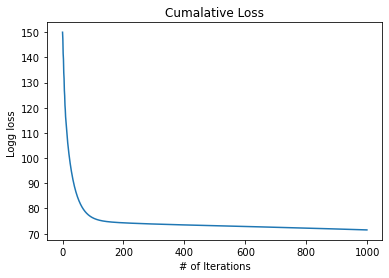

In [221]:
plt.plot(LOSS_VEC)
plt.title('Cumalative Loss')
plt.xlabel('# of Iterations')
plt.ylabel('Logg loss ')

Text(0, 0.5, 'Accuracy')

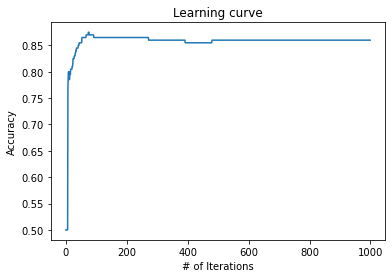

In [222]:
plt.plot(performance)
plt.title('Learning curve')
plt.xlabel('# of Iterations')
plt.ylabel('Accuracy')